In [1]:
!pip install 'dtreeviz'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.3 MB/s eta 0:00:00


In [2]:
!wget https://raw.githubusercontent.com/dlevi150/7506R-2C2023-GRUPO33/main/CHP1/datasets/hotels_train.csv

--2023-09-28 03:14:05--  https://raw.githubusercontent.com/dlevi150/7506R-2C2023-GRUPO33/main/CHP1/datasets/hotels_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9788953 (9.3M) [text/plain]
Saving to: ‘hotels_train.csv’

hotels_train.csv    100%[===================>]   9.33M  --.-KB/s    in 0.06s   

2023-09-28 03:14:05 (147 MB/s) - ‘hotels_train.csv’ saved [9788953/9788953]



In [3]:
!wget https://raw.githubusercontent.com/dlevi150/7506R-2C2023-GRUPO33/main/CHP1/datasets/hotels_test.csv

--2023-09-28 03:14:12--  https://raw.githubusercontent.com/dlevi150/7506R-2C2023-GRUPO33/main/CHP1/datasets/hotels_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4432981 (4.2M) [text/plain]
Saving to: ‘hotels_test.csv’

hotels_test.csv     100%[===================>]   4.23M  --.-KB/s    in 0.06s   

2023-09-28 03:14:12 (68.5 MB/s) - ‘hotels_test.csv’ saved [4432981/4432981]



In [4]:
import pandas as pd
import numpy as np

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [195]:
df = pd.read_csv("hotels_train.csv")

df_filtrado = df.copy()

In [196]:
df.head(3)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0


# Modificando el dataset

In [197]:
df_filtrado = df_filtrado.drop('id', axis=1)
df_filtrado = df_filtrado.drop('company', axis=1)

Al parecer arboles de desición no aceptan dateTime

In [72]:
#mapeamos los meses a numeros
months_dict = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

def mapear_mes_a_numero(fecha):
    if(np.nan == fecha):
        return -1
    return months_dict.get(fecha)

# df_filtrado['arrival_date_month'] = df_filtrado['arrival_date_month'].apply(mapear_mes_a_numero)


# formato_fecha = "%Y-%m-%d"

# df_filtrado['date'] = pd.to_datetime(df_filtrado[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1), format=formato_fecha)
# df_filtrado.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)
# df_filtrado.head(2)

In [198]:
df_filtrado.children = df_filtrado.children.replace(np.nan, 0)
print(f'Nueva media: {df_filtrado.children.mean().round(6)}\nNueva Moda:  {df_filtrado.children.mode()}\n')

Nueva media: 0.104889
Nueva Moda:  0    0.0
Name: children, dtype: float64



In [199]:
moda_vieja = df.agent.mode()
df_filtrado.agent = df_filtrado.agent.replace(np.nan, 9)
moda_nueva = df.agent.mode()
print(f'Moda Vieja: {moda_vieja}\nModa Nueva: {moda_nueva}')

Moda Vieja: 0    9.0
Name: agent, dtype: float64
Moda Nueva: 0    9.0
Name: agent, dtype: float64


In [200]:
df_filtrado['country'] = df_filtrado['country'].replace(np.nan, 'PRT')

In [201]:
df_filtrado = df_filtrado.replace({'adults': 0}, value=2)

In [202]:
df_filtrado = df_filtrado.replace({'children': 10}, value=0)

In [203]:
df_filtrado = df_filtrado.replace({'babies': 9}, value=0)

In [204]:
df_filtrado = df_filtrado.replace({'adr': -6.38}, value=df_filtrado['adr'].median())

In [205]:
df_filtrado = df_filtrado.replace({'adr': 0}, value=df_filtrado['adr'].median())

In [206]:
df_mayor_10 = df_filtrado.loc[df_filtrado['previous_cancellations'] > 10]
df_menor_10 = df_filtrado.loc[df_filtrado['previous_cancellations'] <= 10]
df_mayor_10.drop_duplicates(subset=[col for col in df_filtrado.columns if col not in 'id'], inplace=True)
df_filtrado = pd.concat([df_mayor_10, df_menor_10], ignore_index=True)

<ipython-input-206-89a89f17be70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Sumamos cambios a nuestro dataframe de la primera parte.

Hay demasiado paises y algunos que solo tienen una aparición en reservas, lo cual va a crear demasiadas columnas innecesarias para nuestro dataset, vamoa a probar cambiando algunas por la moda, a continuación nuestro minusioso analisis.

In [82]:
df_filtrado["country"].value_counts()

PRT    28097
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

In [207]:
df_paises_unicos = df_filtrado['country'].value_counts().reset_index()
df_paises_unicos.columns = ['country', 'Conteo']

umbral = 50

resultado = df_paises_unicos[df_paises_unicos['Conteo'] < umbral]
print(f"La cantidad de paises que tiene menos de {umbral} reservas es {resultado.shape[0]}, siendo un total de {resultado.Conteo.sum()} casos")

La cantidad de paises que tiene menos de 50 reservas es 112, siendo un total de 1253 casos


In [208]:
lista_paises_con_pocas_reservas = resultado['country'].unique()
df_filtrado["country"] = df_filtrado["country"].replace(to_replace=lista_paises_con_pocas_reservas, value="PRT")

In [209]:
len(df_filtrado["country"].unique())

37

# Encoding and separation columns

Usando una prroporción de 70 y 30 separo mi dataset en train y validation, con una semilla = 2.

In [210]:
df_filtrado.head(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
0,Resort Hotel,275,2015,October,41,4,2,0,2,0.0,...,A,0,Non Refund,208.0,0,Transient,50.0,0,0,1
1,Resort Hotel,244,2015,September,36,3,0,3,2,0.0,...,A,0,Non Refund,9.0,0,Transient,36.0,0,0,1


In [211]:
ds_encodeado = pd.get_dummies(df_filtrado, columns=["hotel", "arrival_date_month","meal","country","market_segment","distribution_channel","reserved_room_type","assigned_room_type","deposit_type", "customer_type"], drop_first=True)
ds_encodeado.head(3)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,275,2015,41,4,2,0,2,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,244,2015,36,3,0,3,2,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,190,2016,15,9,1,1,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [212]:
ds_trabajo_x=ds_encodeado.drop(['is_canceled'], axis='columns', inplace=False)

ds_trabajo_y = ds_encodeado['is_canceled'].copy()

x_train, x_valid, y_train, y_valid = train_test_split(ds_trabajo_x,
                                                    ds_trabajo_y,
                                                    test_size=0.3,
                                                    random_state=20)

# Entrenamiento y predicción

Probé con criterion=gini pero hay que ajustar algunos parametros, pero tira valores parecido también.

Si funcionó aumentar el min_samples_leaf de 10 a *20*, intenté subirlo pero tampoco sirvio 😞

Bajé el max_depth a *10* y mejoró bastante la presición de "0", pero no fue baja la presición de "1"

El ccp_alpha=0.00000001 va bien por ahora(para gini eliminar dos ceros)

In [ ]:
#tree_model = tree.DecisionTreeClassifier(criterion="entropy",
#                                         max_depth = 15,
#                                         min_samples_leaf=20,
#                                         ccp_alpha=0.00000001)
#Entrenamos el modelo
#model = tree_model.fit(X = x_train, y = y_train)

In [ ]:
#y_pred = model.predict(x_valid)
#Valores Predichos
#y_pred

In [ ]:
#y_valid.values

In [ ]:
#ds_resultados=pd.DataFrame(zip(y_valid,y_pred),columns=['test','pred'])
#ds_resultados.head(10)

In [ ]:
#tabla=confusion_matrix(y_valid, y_pred)

#Grafico la matriz de confusión
#sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
#plt.xlabel('Predicted')
#plt.ylabel('True')

In [ ]:
#accuracy=accuracy_score(y_valid,y_pred)
#recall=recall_score(y_valid,y_pred)
#f1=f1_score(y_valid,y_pred,)
#precision=precision_score(y_valid,y_pred)

#print("Accuracy: "+str(accuracy))
#print("Recall: "+str(recall))
#print("Precision: "+str(precision))
#print("f1 score: "+str(f1))

In [ ]:
#print(classification_report(y_valid,y_pred))

#Busqueda de hiperparametros

In [221]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score

#Cantidad de combinaciones que quiero porbar
n=50

#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini', 'entropy'],
               'min_samples_leaf':list(range(1,5)),
               'min_samples_split': list(range(2,10)),
               'ccp_alpha':np.linspace(0,0.01,10),
               'max_depth':list(range(12,17))}


#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier()

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train);

In [222]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'min_samples_split': 9, 'min_samples_leaf': 3, 'max_depth': 15, 'criterion': 'entropy', 'ccp_alpha': 0.0}
0.848697425238579


aca abajo copie y pegue tal cual el entrenamiento y prediccion, solo por no querer tocarlo

In [223]:
tree_model = tree.DecisionTreeClassifier(criterion=randomcv.best_params_['criterion'],
                                         max_depth = randomcv.best_params_['max_depth'],
                                         ccp_alpha=randomcv.best_params_['ccp_alpha'],
                                         min_samples_leaf=randomcv.best_params_['min_samples_leaf'],
                                         min_samples_split=randomcv.best_params_['min_samples_split'])
#Entrenamos el modelo
model = tree_model.fit(X = x_train.sort_index(axis=1), y = y_train)

In [99]:
# tree_model = tree.DecisionTreeClassifier(criterion=randomcv.best_params_['criterion'],
#                                          max_depth = randomcv.best_params_['max_depth'],
#                                          ccp_alpha=randomcv.best_params_['ccp_alpha'],
#                                          min_samples_leaf=randomcv.best_params_['min_samples_leaf'],
#                                          min_samples_split=randomcv.best_params_['min_samples_split'])
# #Entrenamos el modelo
# model = tree_model.fit(X = x_train, y = y_train)

In [224]:
y_pred = model.predict(x_valid.sort_index(axis=1))
#Valores Predichos
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [225]:
y_valid.values

array([0, 0, 1, ..., 0, 0, 0])

In [165]:
ds_resultados=pd.DataFrame(zip(y_valid,y_pred),columns=['test','pred'])
ds_resultados.head(10)

,test,pred
0,0,1
1,0,1
2,1,1
3,1,1
4,1,1
5,0,1
6,1,1
7,1,1
8,1,1
9,0,0


Text(50.722222222222214, 0.5, 'True')

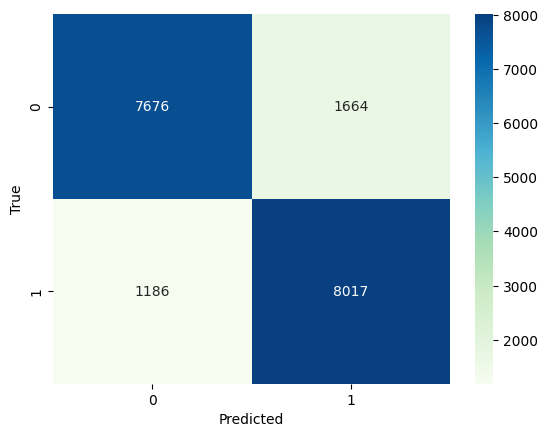

In [226]:
tabla=confusion_matrix(y_valid, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [227]:
accuracy=accuracy_score(y_valid,y_pred)
recall=recall_score(y_valid,y_pred)
f1=f1_score(y_valid,y_pred,)
precision=precision_score(y_valid,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1))

Accuracy: 0.8463031871865394
Recall: 0.8711289796805389
Precision: 0.8281169300692077
f1 score: 0.8490785850455412


In [228]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      9340
           1       0.83      0.87      0.85      9203

    accuracy                           0.85     18543
   macro avg       0.85      0.85      0.85     18543
weighted avg       0.85      0.85      0.85     18543



# Test prediction

## modifico el df

In [175]:
df_test = pd.read_csv("hotels_test.csv")

df_test_filtrado = df_test.copy()

In [176]:
df_test_ids = df_test['id']
df_test_filtrado = df_test_filtrado.drop('id', axis=1)
df_test_filtrado = df_test_filtrado.drop('company', axis=1)
df_test_filtrado = df_test_filtrado.drop('reservation_status_date', axis=1)

In [177]:
df_test_filtrado['country'] = df_test_filtrado['country'].replace(np.nan, 'PRT')
df_test_filtrado.agent = df_test_filtrado.agent.replace(np.nan, 9)
df_filtrado.children = df_filtrado.children.replace(np.nan, 0)

In [178]:
df_test_filtrado.isna().any()

hotel                             False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
days_in_waiting_list              False
customer_type                     False


saco los paises con menos de 5 apariciones y seteo la moda="PRT", necesito que me confirmen si es la moda del dataset de train o es de este de test?

Deberia ser la moda del set de train

In [179]:
df_test_paises_unicos = df_test_filtrado['country'].value_counts().reset_index()
df_test_paises_unicos.columns = ['country', 'Conteo']

umbral = 8

resultado = df_test_paises_unicos[df_test_paises_unicos['Conteo'] < umbral]
print(f"La cantidad de paises que tiene menos de {umbral} reservas es {resultado.shape[0]}, siendo un total de {resultado.Conteo.sum()} casos")

La cantidad de paises que tiene menos de 8 reservas es 69, siendo un total de 173 casos


In [180]:
lista_paises_con_pocas_reservas = resultado['country'].unique()
df_test_filtrado["country"] = df_test_filtrado["country"].replace(to_replace=lista_paises_con_pocas_reservas, value="PRT")

In [181]:
df_test_filtrado["country"].unique()

array(['PRT', 'FRA', 'DEU', 'CN', 'GBR', 'ITA', 'IRL', 'USA', 'ESP',
       'SWE', 'NLD', 'AUT', 'AUS', 'RUS', 'CHE', 'CHN', 'DNK', 'POL',
       'BEL', 'BRA', 'TUR', 'NOR', 'EST', 'ISL', 'VEN', 'ISR', 'JPN',
       'MAR', 'HRV', 'IRN', 'LTU', 'FIN', 'PER', 'LVA', 'KOR', 'LUX',
       'HUN', 'DZA', 'TWN', 'THA', 'ROU', 'IND', 'ARG', 'CHL', 'MEX',
       'ARE', 'MOZ', 'SAU', 'ECU', 'GRC', 'AGO', 'CZE', 'TUN', 'BGR',
       'COL', 'SRB', 'EGY', 'CYP', 'NZL', 'SVK', 'SGP', 'UKR', 'IDN',
       'PHL', 'SVN', 'NGA'], dtype=object)

Tratamos de eliminar los paises que solo aparecen en el set de test y no en el de train.

In [182]:
lista_paises_unicos_test = df_test_filtrado['country'].unique()
lista_paises_unicos = df_filtrado['country'].unique()
conjunto1 = set(lista_paises_unicos)
conjunto2 = set(lista_paises_unicos_test)


# Obtener los elementos que están en conjunto1 pero no en conjunto2
elementos_en_lista1_no_en_lista2 = list(conjunto2 - conjunto1)
print(elementos_en_lista1_no_en_lista2)

df_test_filtrado["country"] = df_test_filtrado["country"].replace(to_replace=elementos_en_lista1_no_en_lista2, value="PRT")

['ARE', 'SVK', 'SRB', 'DZA', 'PHL', 'NGA', 'CHL', 'NZL', 'ECU', 'IRN', 'LVA', 'VEN', 'TWN', 'CYP', 'TUN', 'SGP', 'SVN', 'LTU', 'UKR', 'IDN', 'COL', 'MOZ', 'MEX', 'PER', 'SAU', 'THA', 'EGY', 'EST', 'ISL', 'BGR']


In [183]:
df_test_filtrado["country"].value_counts()

PRT    12685
GBR     2387
FRA     2118
ESP     1757
DEU     1405
ITA      868
IRL      681
BRA      483
BEL      471
USA      420
NLD      412
CHE      345
AUT      266
CHN      243
CN       236
SWE      217
POL      194
ISR      144
RUS      135
NOR      125
ROU      109
FIN       96
AUS       95
AGO       93
DNK       92
MAR       65
LUX       65
TUR       60
HUN       46
ARG       44
CZE       43
JPN       43
GRC       28
IND       23
KOR       22
HRV       19
Name: country, dtype: int64

In [184]:
df_paises_unicos.shape

(149, 2)

In [185]:
elementos_en_lista1_no_en_lista2

['ARE',
 'SVK',
 'SRB',
 'DZA',
 'PHL',
 'NGA',
 'CHL',
 'NZL',
 'ECU',
 'IRN',
 'LVA',
 'VEN',
 'TWN',
 'CYP',
 'TUN',
 'SGP',
 'SVN',
 'LTU',
 'UKR',
 'IDN',
 'COL',
 'MOZ',
 'MEX',
 'PER',
 'SAU',
 'THA',
 'EGY',
 'EST',
 'ISL',
 'BGR']

In [186]:
df_test_encodeado = pd.get_dummies(df_test_filtrado, columns=["hotel", "arrival_date_month","meal","country","market_segment","distribution_channel","reserved_room_type","assigned_room_type","deposit_type", "customer_type"], drop_first=True)


## Predigo

Estoy viendo columnas con paises que no aparecian previamente, la solución cortarlos de raíz (?, creo que no es viable, es más probable mandarlos a la moda ya que son valores muy raros, y solo pasan con 4 por lo menos en el de test, podemos considerar lo mismo para el de train.

Ejecuto el cambio y pruebo.

Probé el ajuste de cambiar el set de train, eliminar todos los paises de menor a 50 reservas, no eran muchos, cerca de mil, lo especifico arriba, y entonces ahora solo hay un pais que no está en las columnas del dataset que se usó para entrenar,

Al parecer no te deja predecir si es que no tienes las mismas columnas :cry in silence:

Podemos agregar las columnas faltantes con todos cerosss!!! esa es buena jaja, debí pensarlo antes, pero ya me vence el sueño

pd: avisenme si estan tocando el modelo sin mi :c

In [187]:
lista = df_test_encodeado.columns
columnas_faltantes = []
for colum in ds_encodeado.columns:
  if(colum not in lista and colum != "is_canceled"):
    print(colum)
    columnas_faltantes.append(colum)

for colum_faltante in columnas_faltantes:
  df_test_encodeado[colum_faltante] = 0

country_ZAF
market_segment_Undefined
distribution_channel_Undefined
assigned_room_type_L


In [142]:
ds_encodeado.shape

(61810, 107)

In [141]:
df_test_encodeado.shape

(26535, 132)

In [188]:
lista = ds_encodeado.columns
for colum in df_test_encodeado.columns:
  if(colum not in lista):
    print(colum)

Hay filas que con paises que no estuvieron en el set de entrenamiento.

In [189]:
print('todas las columnas que no aparecen en neustro otro dataset:')
lista = df_test_encodeado.columns
for colum in ds_encodeado.columns:
  if(colum not in lista):
    print(colum)

todas las columnas que no aparecen en neustro otro dataset:
is_canceled


In [230]:
test_pred_2 = model.predict(df_test_encodeado.sort_index(axis=1))
#Valores Predichos
test_pred_2

array([1, 1, 0, ..., 1, 1, 0])

In [229]:

# anterior = {'anterior': test_pred}


In [231]:
# chage = {'nuevo': test_pred_2, 'viejo': list(anterior['anterior'])}

In [ ]:
# df_compare = pd.DataFrame(chage)
# df_compare

In [234]:
# Crear un DataFrame con las columnas "id" e "is_canceled"
data = {'id': df_test_ids, 'is_canceled': test_pred_2}
df_final_finalisimo = pd.DataFrame(data)

In [235]:
df_final_finalisimo.isna().any()

id             False
is_canceled    False
dtype: bool

In [236]:
# df_final_finalisimo.to_csv('submission.csv', index=False)
